* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv     

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Morning.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Monday-WorkingHours.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Tuesday-WorkingHours.pcap_ISCX.csv

* /content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Wednesday-workingHours.pcap_ISCX.csv


Flow Bytes/s에 15개 null 값이 있다.

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [265]:
PortScan = pd.read_csv("/content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")

In [266]:
PortScan.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [267]:
PortScan.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,2.864520e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,286467.000000,286467.0,286467.0,286467.0,286467.000000,286467.000000,2.864670e+05,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.0,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.000000,286467.0,286467.0,286467.0,286467.0,286467.0,286467.0,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05
mean,8044.876324,5.379331e+06,3.473283,3.520500,233.407667,2.707247e+03,81.033369,10.352013,24.138688,24.590994,185.649851,27.478530,76.473013,55.742307,inf,inf,3.435661e+05,6.690304e+05,1.821288e+06,1.152034e+04,5.255228e+06,7.790948e+05,5.086644e+05,1.773447e+06,4.483619e+05,4.968463e+06,7.972503e+05,3.961929e+05,1.569683e+06,5.053646e+05,0.020994,0.0,0.0,0.0,91.861527,87.156077,4.140927e+04,2.110817e+04,10.124908,206.783141,47.863395,61.756216,3.557227e+04,0.008692,0.020994,0.000073,0.660694,0.124116,0.044672,0.0,0.000073,0.850625,55.157954,24.138688,76.473013,91.861527,0.0,0.0,0.0,0.0,0.0,0.0,3.473283,233.407667,3.520500,2.707247e+03,11145.127076,1155.099977,1.728618,29.075328,3.409213e+04,2.294987e+04,7.785722e+04,2.171380e+04,1.602973e+06,6.120390e+04,1.647188e+06,1.536286e+06
std,15378.583442,2.192364e+07,19.515131,28.288916,1865.523600,5.097783e+04,327.768035,24.237795,78.381542,117.218043,585.720606,54.209647,204.152865,196.643780,NaN,NaN,2.124999e+06,3.830433e+06,9.034294e+06,3.800536e+05,2.179685e+07,5.979401e+06,2.575708e+06,9.019385e+06,5.776419e+06,2.125371e+07,6.242734e+06,2.371670e+06,8.712596e+06,6.042689e+06,0.143363,0.0,0.0,0.0,503.560131,698.237440,1.601312e+05,6.246254e+04,18.768649,636.614018,122.031372,178.209296,1.631016e+05,0.092826,0.143363,0.008562,0.473475,0.329714,0.206583,0.0,0.008562,0.450208,129.794071,78.381542,204.152865,503.560131,0.0,0.0,0.0,0.0,0.0,0.0,19.515131,1865.523600,28.288916,5.097783e+04,14274.278654,6645.329412,14.897361,8.014607,4.659319e+05,2.623049e+05,7.342606e+05,4.223145e+05,8.682334e+06,1.217016e+06,8.882728e+06,8.561545e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000

PortScan    158930
BENIGN      127537
Name:  Label, dtype: int64


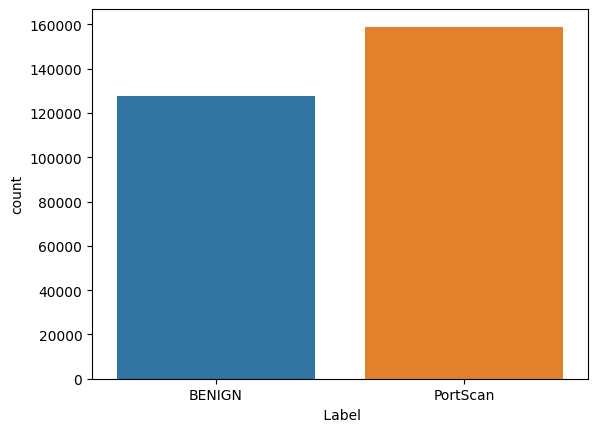

In [268]:
print(PortScan[" Label"].value_counts())
sns.countplot(x=" Label", data=PortScan)
plt.show()

 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
 Total Backward Packets          0
Total Length of Fwd Packets      0
 Total Length of Bwd Packets     0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
 Fwd Packet Length Std           0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
 Bwd Packet Length Std           0
Flow Bytes/s                    15
 Flow Packets/s                  0
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
Fwd IAT Total                    0
 Fwd IAT Mean                    0
 Fwd IAT Std                     0
 Fwd IAT Max                     0
 Fwd IAT Min                     0
Bwd IAT Total                    0
 Bwd IAT Mean                    0
 Bwd IAT Std                     0
 Bwd IAT Max        

<Axes: >

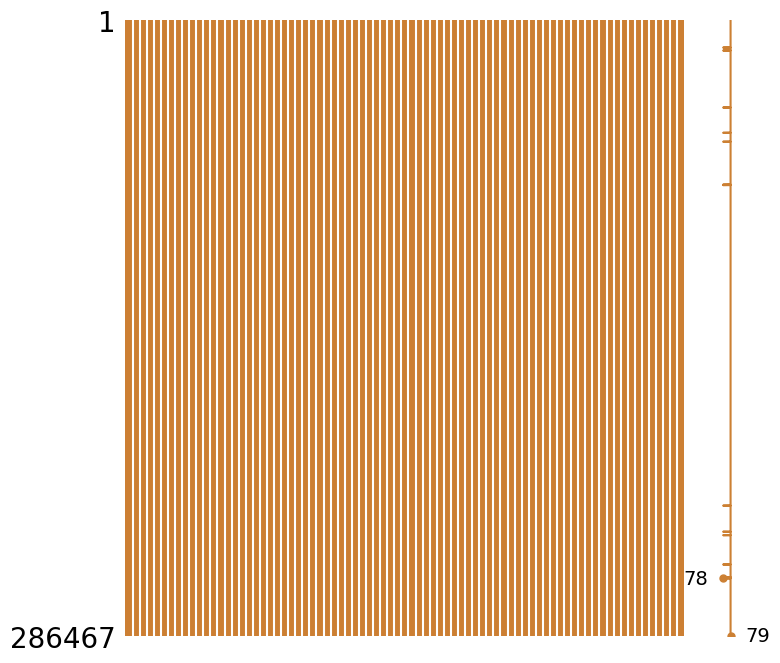

In [269]:
print(PortScan.isnull().sum())
msno.matrix(PortScan, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

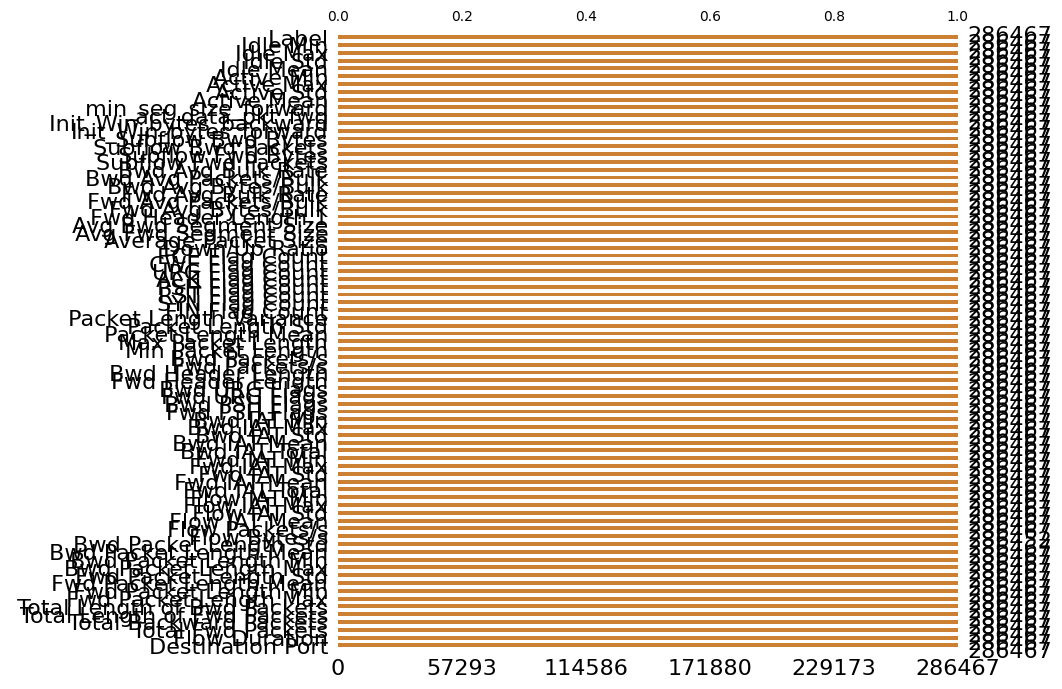

In [270]:
msno.bar(df = PortScan.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

null 값은 그냥 없에도 별 문제 없을듯

In [271]:
null_Port = PortScan[PortScan["Flow Bytes/s"].isna()]

In [272]:
null_Port.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
12824,13370,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,65535,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
12827,52508,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,227,65535,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
14192,46058,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,227,229,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
40707,57119,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,65535,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
52456,16506,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,64,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,229,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [273]:
PortScan = PortScan.replace('NaN', np.nan)

In [274]:
PortScan = PortScan.dropna()

In [275]:
PortScan.isnull().sum()

 Destination Port               0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max                    0
 Fwd IAT Min                    0
Bwd IAT Total                   0
 Bwd IAT Mean                   0
 Bwd IAT Std                    0
 Bwd IAT Max                    0
 Bwd IAT Min  

In [276]:
PortScan.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286452.000000,2.864520e+05,286452.000000,286452.000000,286452.000000,2.864520e+05,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,286452.000000,286452.0,286452.0,286452.0,286452.000000,286452.000000,2.864520e+05,2.864520e+05,286452.000000,286452.000000,286452.000000,286452.000000,2.864520e+05,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.0,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.000000,286452.0,286452.0,286452.0,286452.0,286452.0,286452.0,286452.000000,286452.000000,286452.000000,2.864520e+05,286452.000000,286452.000000,286452.000000,286452.000000,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05,2.864520e+05
mean,8043.205815,5.379612e+06,3.473392,3.520653,233.419889,2.707389e+03,81.037612,10.352555,24.139952,24.592282,185.659573,27.479969,76.477017,55.745226,inf,inf,3.435840e+05,6.690654e+05,1.821383e+06,1.152094e+04,5.255503e+06,7.791356e+05,5.086910e+05,1.773540e+06,4.483854e+05,4.968723e+06,7.972921e+05,3.962136e+05,1.569765e+06,5.053911e+05,0.020995,0.0,0.0,0.0,91.863949,87.159636,4.141144e+04,2.110927e+04,10.125438,206.793969,47.865901,61.759450,3.557414e+04,0.008693,0.020995,0.000073,0.660728,0.124070,0.044667,0.0,0.000073,0.850638,55.160843,24.139952,76.477017,91.863949,0.0,0.0,0.0,0.0,0.0,0.0,3.473392,233.419889,3.520653,2.707389e+03,11145.205787,1154.436234,1.728708,29.075133,3.409392e+04,2.295107e+04,7.786130e+04,2.171493e+04,1.603057e+06,6.120711e+04,1.647274e+06,1.536366e+06
std,15376.804461,2.192418e+07,19.515636,28.289648,1865.571678,5.097916e+04,327.776093,24.238314,78.383399,117.220977,585.734400,54.210701,204.157460,196.648515,NaN,NaN,2.125053e+06,3.830531e+06,9.034521e+06,3.800636e+05,2.179739e+07,5.979554e+06,2.575773e+06,9.019612e+06,5.776569e+06,2.125423e+07,6.242895e+06,2.371731e+06,8.712817e+06,6.042846e+06,0.143367,0.0,0.0,0.0,503.573192,698.255539,1.601351e+05,6.246399e+04,18.768997,636.628927,122.034076,178.213402,1.631057e+05,0.092828,0.143367,0.008562,0.473463,0.329662,0.206572,0.0,0.008562,0.450203,129.796856,78.383399,204.157460,503.573192,0.0,0.0,0.0,0.0,0.0,0.0,19.515636,1865.571678,28.289648,5.097916e+04,14273.761593,6642.626199,14.897746,8.014742,4.659441e+05,2.623118e+05,7.342796e+05,4.223256e+05,8.682553e+06,1.217047e+06,8.882952e+06,8.561762e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000

In [277]:
label = PortScan[' Label'].astype('category').cat.codes
PortScan.drop(" Label", axis=1, inplace=True)

In [278]:
percentile_95 = np.nanpercentile(PortScan[PortScan != np.inf], 95)
min_value = np.nanmin(PortScan[PortScan != -np.inf])

PortScan[PortScan == np.inf] = percentile_95
PortScan[PortScan == -np.inf] = min_value

In [279]:
std = StandardScaler()
std_port_scan = std.fit_transform(PortScan)

In [280]:
std_port_scan = pd.DataFrame(std_port_scan, columns=PortScan.columns)

In [281]:
def correlation(data, label):
  data[" Label"] = label
  corr = data.corr(numeric_only=True)
  corr = corr[" Label"]
  plt.figure(figsize=(10, 15))
  sns.barplot(x=corr.sort_values(ascending=False).values, y=corr.sort_values(ascending=False).index)
  plt.title('Feature Correlation with Label')
  plt.xlabel('Correlation coefficient')
  plt.ylabel('Features')
  plt.show()
  return corr.sort_values(ascending=False)

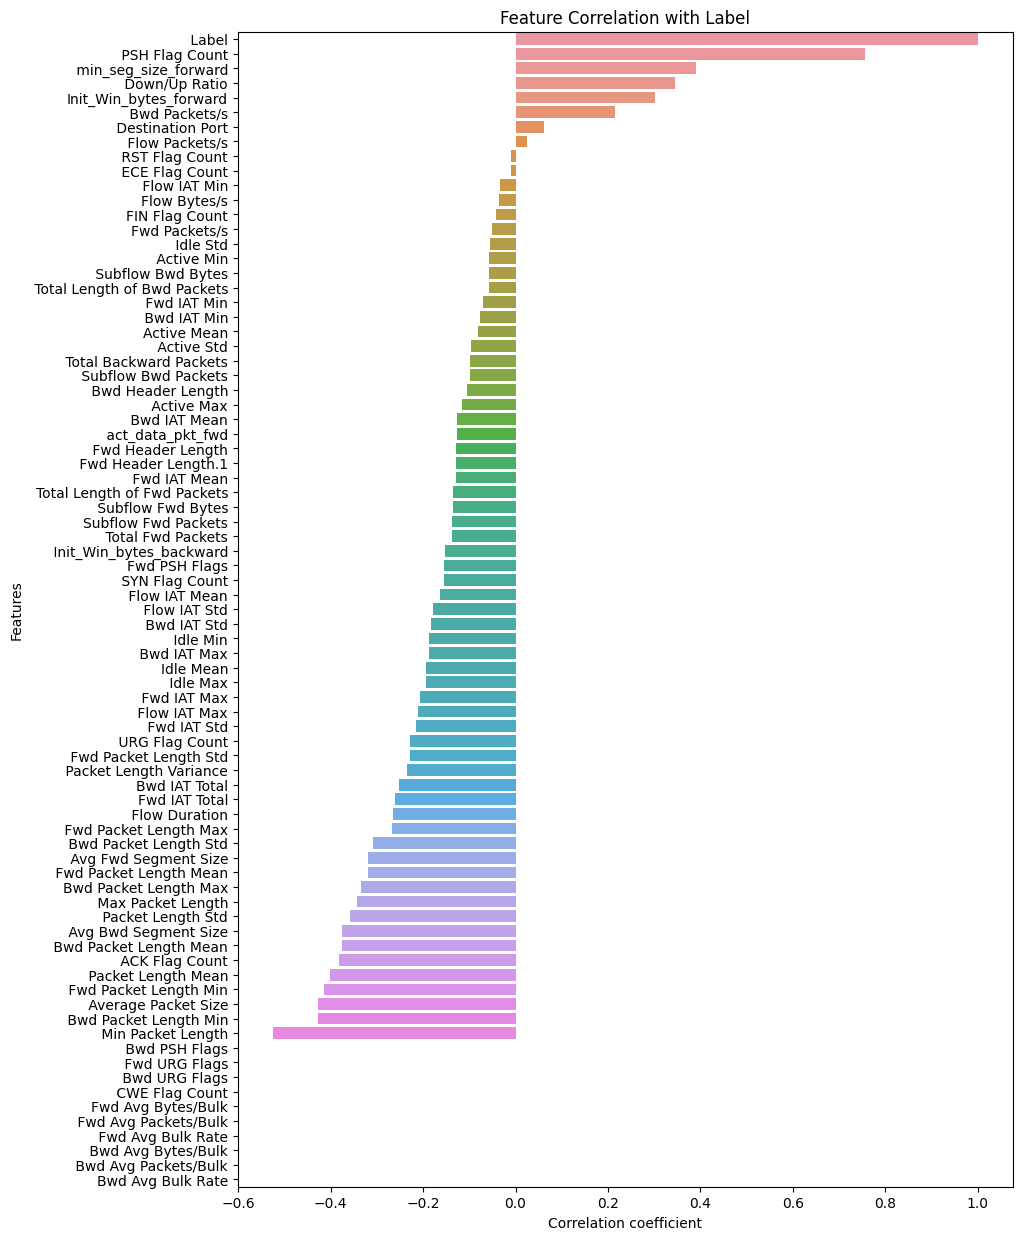

In [282]:
corr = correlation(std_port_scan, label)
threshold = (corr > 0.4) | (corr < -0.4)
selected_columns = corr[threshold].index.tolist()[1:]

In [283]:
train_data = std_port_scan[selected_columns]

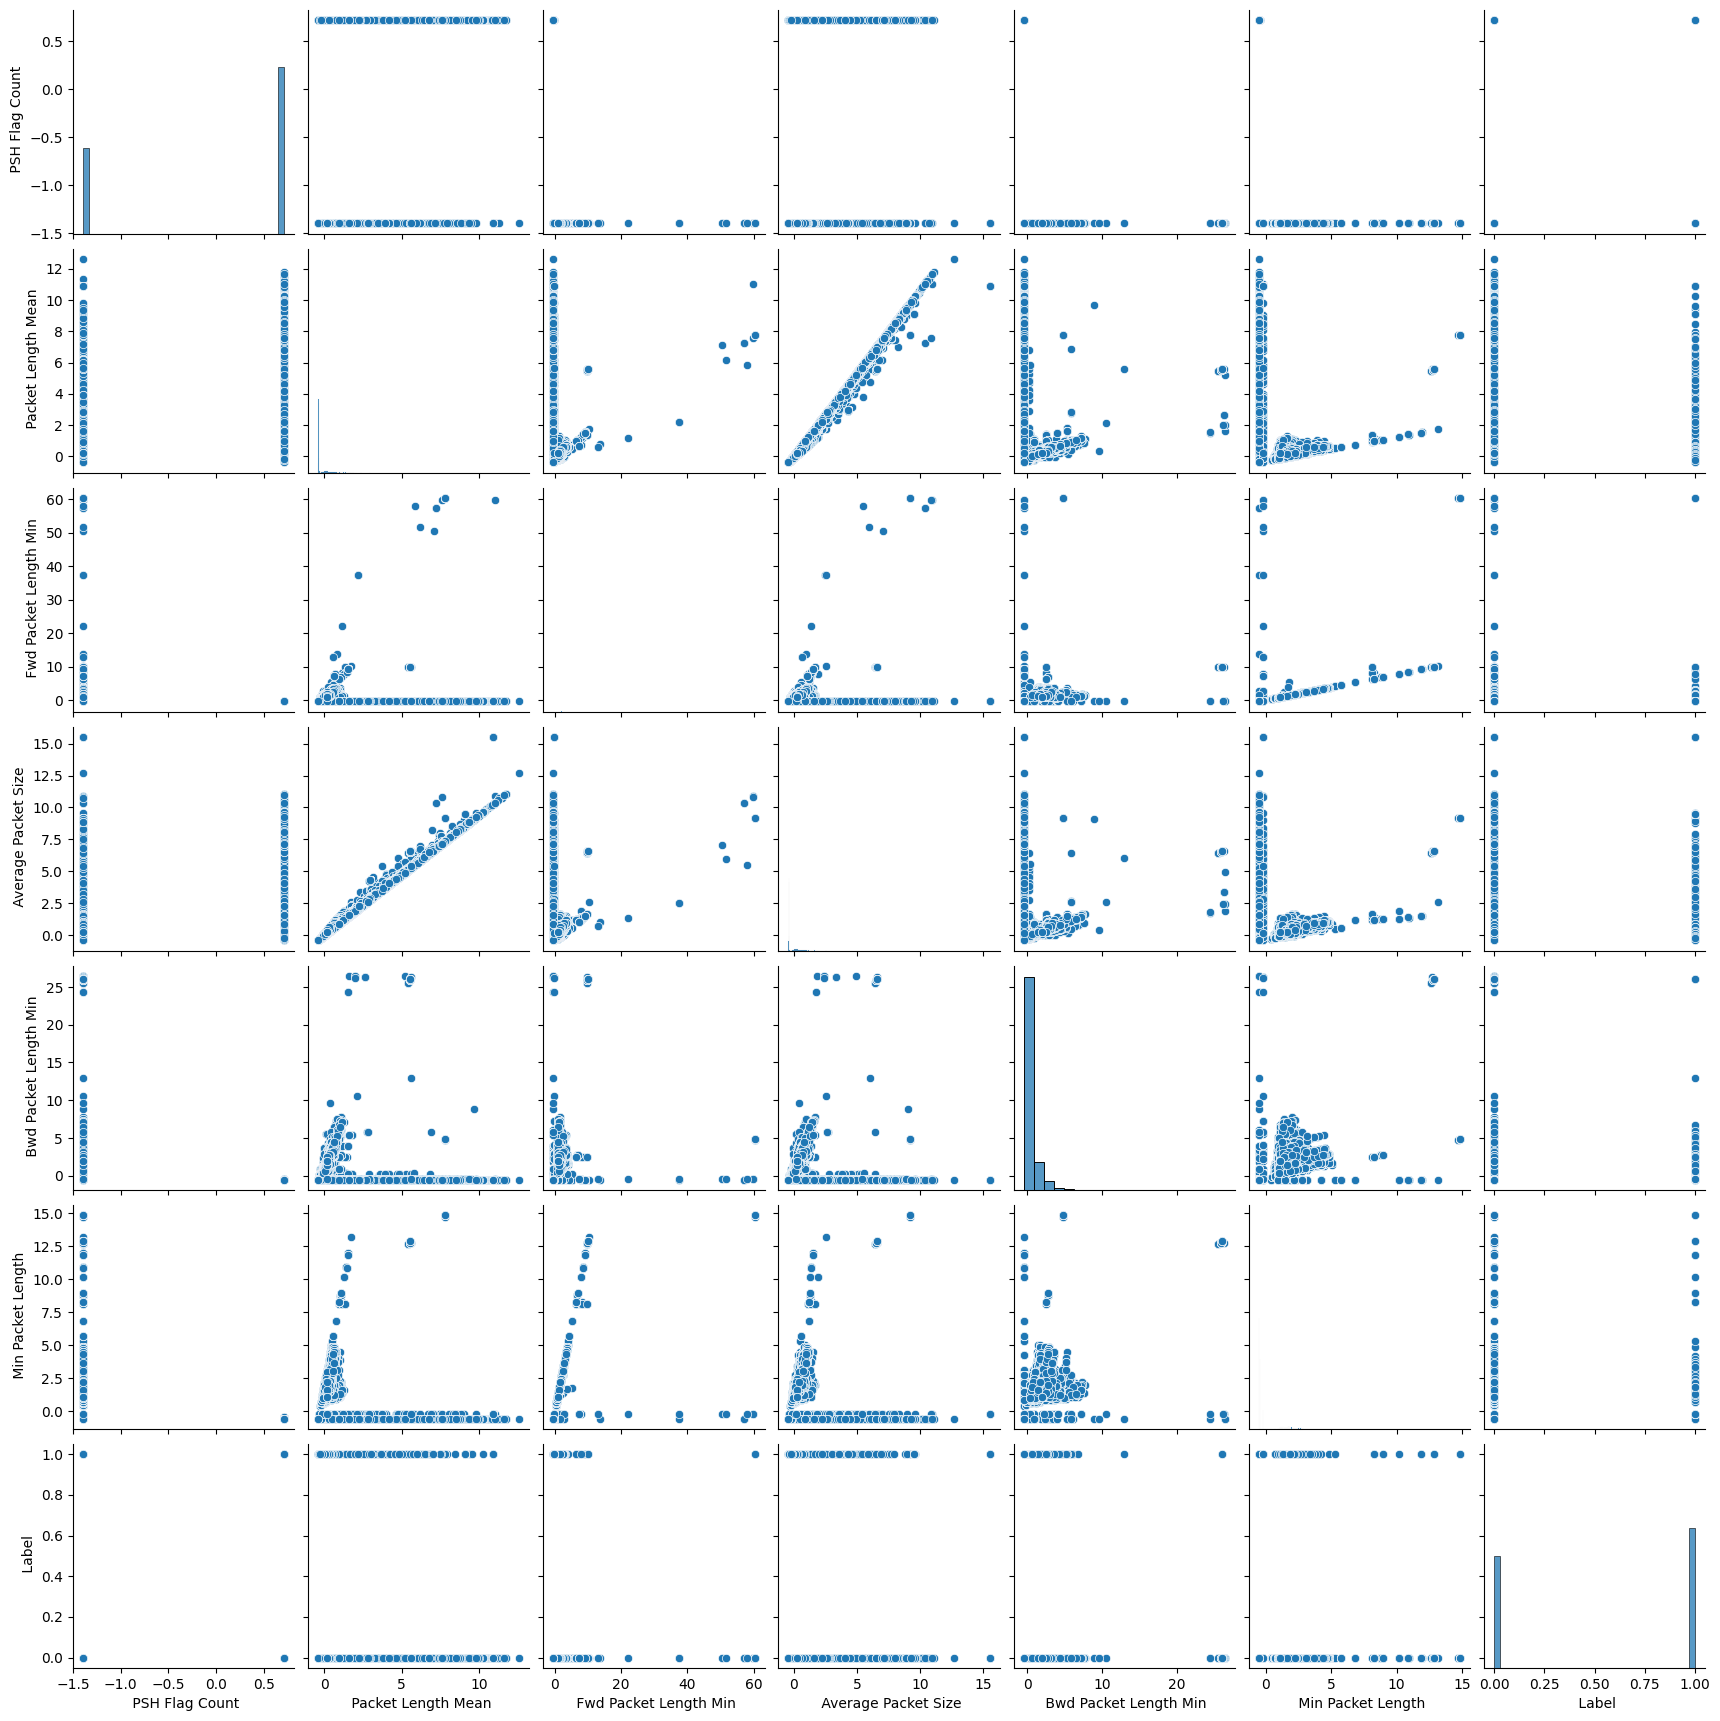

In [284]:
anly_data = train_data.copy()
anly_data[" Label"] = label
sns.pairplot(anly_data, vars=anly_data.columns)

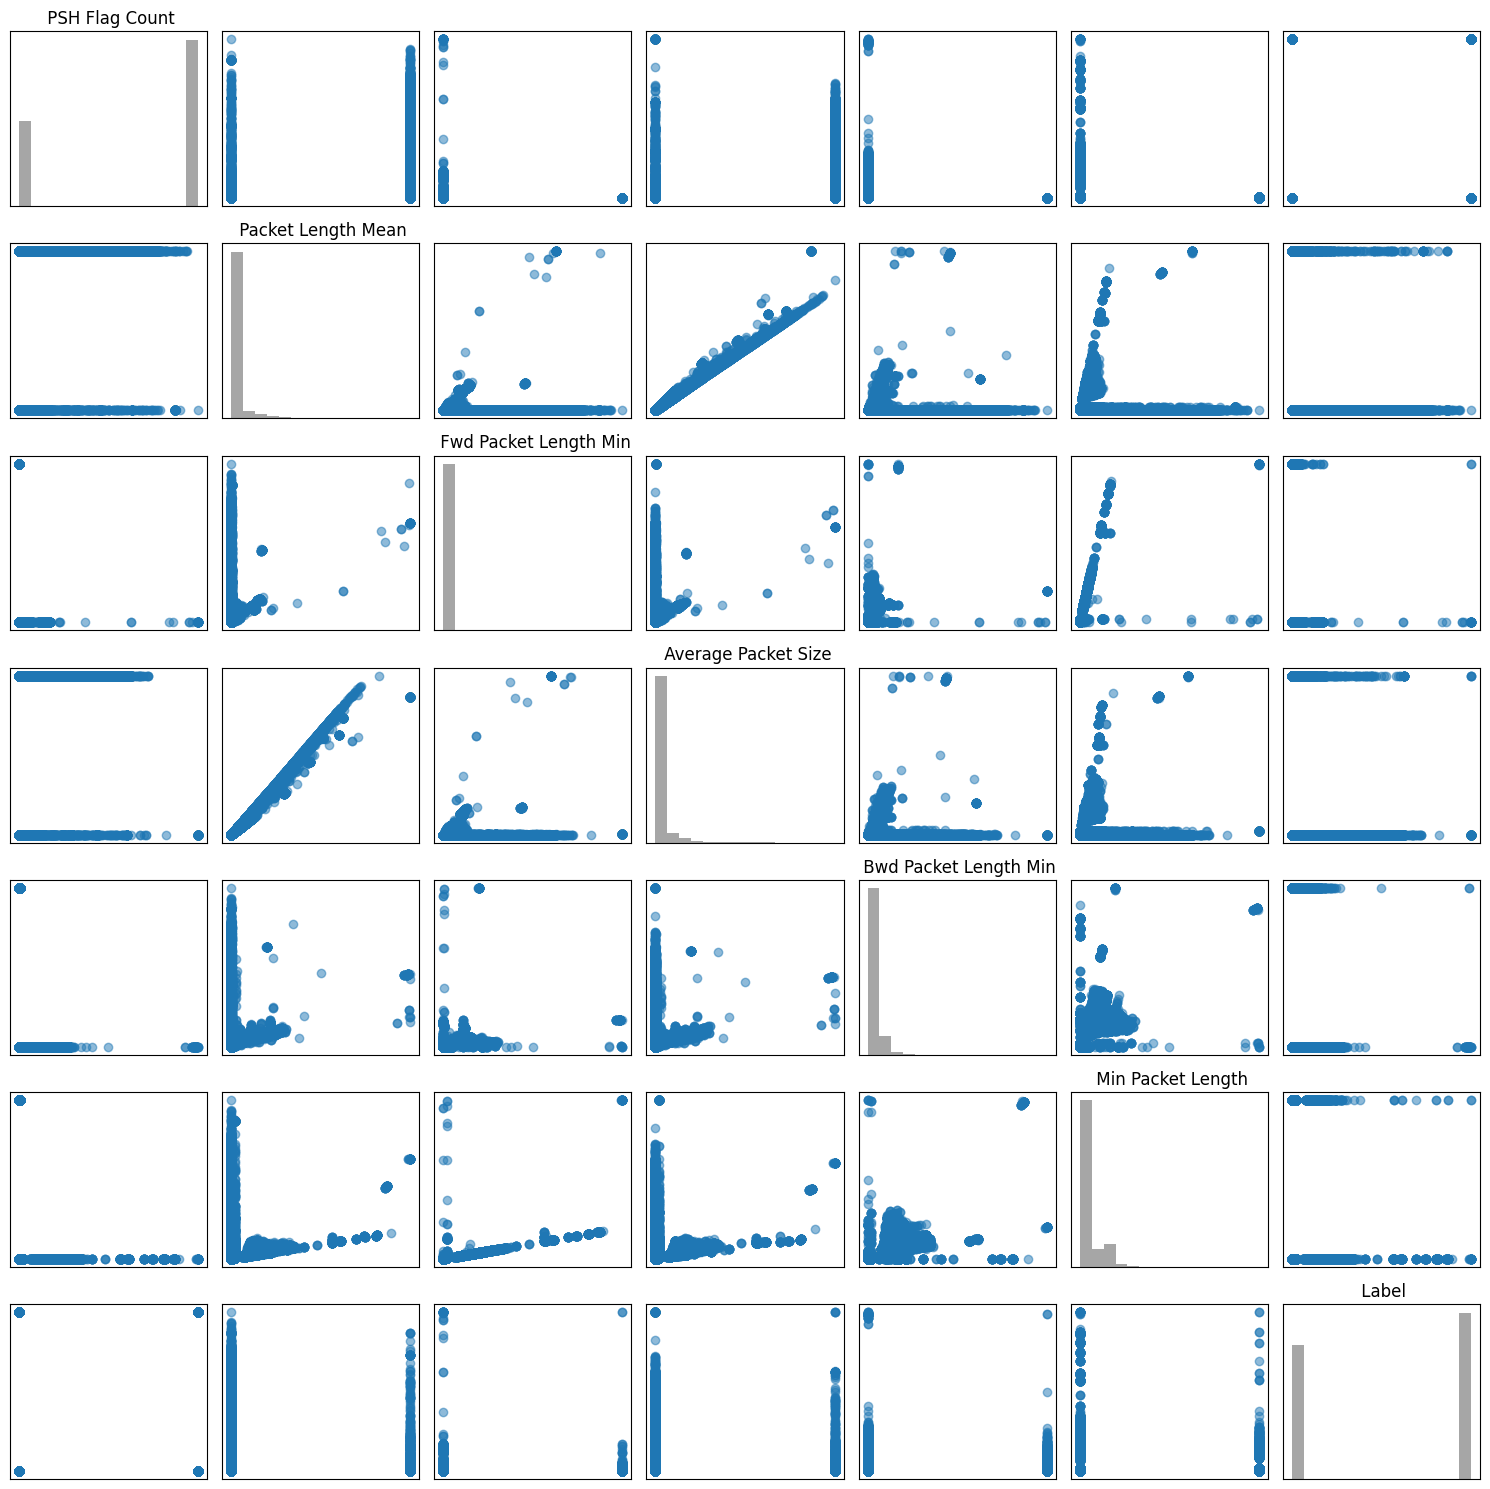

In [285]:
columns = anly_data.columns
num_features_to_plot = len(anly_data.columns)
features_to_plot = anly_data[:num_features_to_plot]

fig, axes = plt.subplots(num_features_to_plot, num_features_to_plot, figsize=(15, 15))

for i, feature_i in enumerate(features_to_plot):
    for j, feature_j in enumerate(features_to_plot):
        ax = axes[i, j]
        if i == j:
            ax.hist(anly_data[feature_i], bins=15, color='gray', alpha=0.7)
            ax.set_title(feature_i)
        else:
            ax.scatter(anly_data[feature_i], anly_data[feature_j], alpha=0.5)

        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

In [286]:
train_data = np.array(train_data)

In [287]:
x_train, x_test, y_train, y_test = train_test_split(train_data, label, test_size=0.1, stratify=label)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [294]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_valid, label=y_valid)
ddtest = xgb.DMatrix(x_test, label=y_test)

params = {
'subsample': 1.0,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0,
  'num_class': 2
}

evals = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(params, dtrain, num_boost_round=500, evals=evals)

[0]	train-mlogloss:0.64528	eval-mlogloss:0.64524
[1]	train-mlogloss:0.60197	eval-mlogloss:0.60190
[2]	train-mlogloss:0.56260	eval-mlogloss:0.56249
[3]	train-mlogloss:0.52666	eval-mlogloss:0.52652
[4]	train-mlogloss:0.49373	eval-mlogloss:0.49357
[5]	train-mlogloss:0.46348	eval-mlogloss:0.46329
[6]	train-mlogloss:0.43561	eval-mlogloss:0.43539
[7]	train-mlogloss:0.40987	eval-mlogloss:0.40963
[8]	train-mlogloss:0.38604	eval-mlogloss:0.38577
[9]	train-mlogloss:0.36394	eval-mlogloss:0.36365
[10]	train-mlogloss:0.34341	eval-mlogloss:0.34310
[11]	train-mlogloss:0.32430	eval-mlogloss:0.32397
[12]	train-mlogloss:0.30650	eval-mlogloss:0.30615
[13]	train-mlogloss:0.28988	eval-mlogloss:0.28951
[14]	train-mlogloss:0.27436	eval-mlogloss:0.27397
[15]	train-mlogloss:0.25984	eval-mlogloss:0.25944
[16]	train-mlogloss:0.24625	eval-mlogloss:0.24583
[17]	train-mlogloss:0.23351	eval-mlogloss:0.23307
[18]	train-mlogloss:0.22157	eval-mlogloss:0.22111
[19]	train-mlogloss:0.21036	eval-mlogloss:0.20988
[20]	train

In [290]:
pred = bst.predict(ddtest)
print(accuracy_score(pred, y_test))
print(f1_score(pred, y_test))

0.997032744536759
0.9973200491849796


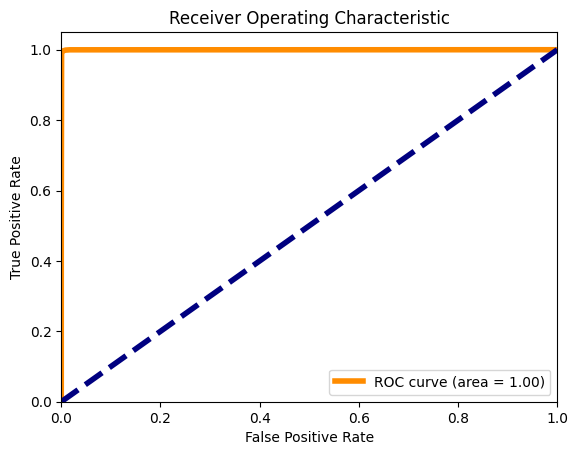

In [291]:
y_scores = bst.predict(ddtest, output_margin=True)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 4
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ----------------------------------------------------------------------------

In [ ]:
# PATH = "/content/drive/MyDrive/MachineLearningCVE(CIC-2017 보안 데이터)/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
# PortScan = pd.read_csv(PATH)

# PortScan = PortScan.replace('NaN', np.nan)
# PortScan = PortScan.dropna()
# PortScan.drop(" Label", axis=1, inplace=True)

# percentile_95 = np.nanpercentile(PortScan[PortScan != np.inf], 95)
# min_value = np.nanmin(PortScan[PortScan != -np.inf])

# PortScan[PortScan == np.inf] = percentile_95
# PortScan[PortScan == -np.inf] = min_value

# std_port_scan = std.fit_transform(PortScan)
# std_port_scan = pd.DataFrame(std_port_scan, columns=PortScan.columns)

# selected_columns = corr[threshold].index.tolist()
# train_datan = np.array(train_data)

In [ ]:
# train_datan = xgb.DMatrix(train_datan)
# pred = bst.predict(train_datan)

In [ ]:
unique, counts = np.unique(pred, return_counts=True)

In [ ]:
value_counts = dict(zip(unique, counts))
print(value_counts)